In [ ]:
# http://ailaby.com/logistic_reg/
# python sklearn でロジスティック回帰。fit して predict、引数 C で正則化
# のsklearnをstatsmodelsに置き換える
# FIXME: train_test_splitとStandardScalerは本筋ではないのでとりあえずそのまま...

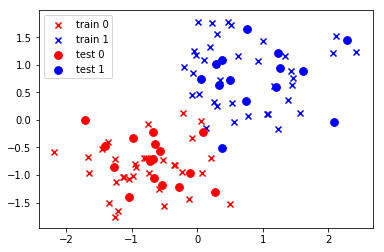

In [158]:
# ここは logistic.ipynb と同じ

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
 
# 乱数の固定化
np.random.seed(seed=0)

# (2,2)を中心に、第二引数分分散したデータを50個作る
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))

# (6,7)を中心に、第二引数分分散したデータを50個作る
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))

# 行列を縦に連結
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)

# 訓練データとテストデータを3:7に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 特徴データを標準化(平均 0、標準偏差 1)
# 標準化について: https://bellcurve.jp/statistics/course/7801.html
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# X[Y==0] は、ndarrayに対する、Yの条件を満たすXの要素を計算する式
# 例:
# A = np.array([1,2,3])
# a = np.array([0,0,1])
# print(A[a==0]) # => [1,2]

# X[Y==0, 0] は、上記の結果に対する行列のアクセスも含むやつ
# 例:
# B = np.array([[1, 100], [2, 200], [3, 300]])
# b = np.array([0,0,1])
# print(B[b==0,1]) # => [100, 200]

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')

In [199]:
import statsmodels.api as sm

xx = sm.add_constant(X_train_std)
result = sm.Logit(endog=y_train, exog=xx).fit(maxiter=15)
result.summary()

         Current function value: 0.000078
         Iterations: 15


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Jan 2018   Pseudo R-squ.:                  0.9999
Time:                        03:52:56   Log-Likelihood:             -0.0054754
converged:                      False   LL-Null:                       -48.492
                                        LLR p-value:                 8.764e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.5035     81.844     -0.434      0.664    -195.915     124.908
x1           533.0968   1195.181      0.446      0.656   -1809.415    2875.608
x2           193.5514    423.196      0.457      0.647    -635.898    1023.001
==============================================================================

Possibly complete quasi-separation: A fraction 0.96 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[ 1.]


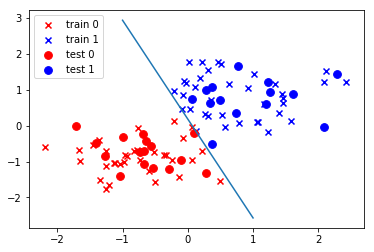

In [201]:
# 境界線
const = result.params[0]
x1 = result.params[1]
x2 = result.params[2]
v = np.linspace(-1, 1, 5)
plt.plot(v, (lambda x: (x1 * x + const)/-x2)(v))

# 95% 信頼区間
conf_int = result.conf_int()

const = conf_int[0][0]
x1 = conf_int[1][0]
x2 = conf_int[2][0]
v = np.linspace(-1, 1, 5)
# plt.plot(v, (lambda x: (x1 * x + const)/-x2)(v), 'g')

const = conf_int[0][1]
x1 = conf_int[1][1]
x2 = conf_int[2][1]
v = np.linspace(-1, 1, 5)
# plt.plot(v, (lambda x: (x1 * x + const)/-x2)(v), 'g')


plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')

print(model.predict([[1,0]]))


In [83]:
## sklearnとsm.Logitの比較

# sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9) # Cは無限大に近い方がstatsmodelsの結果と一致するようになる
mdl = model.fit(X_train_std, y_train)
print(model.intercept_) # fit_interceptがfalseなら0になる
print(model.coef_)

# sm
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train_std)
f = logit.fit(disp=0)
print(f.params)

# =>
# 0.0
# [[ 18.80958202  11.35340685]]
# [ 18.8405609   11.37914275]
# だいたい同じ!!

0.0
[[ 18.80958202  11.35340685]]
[ 18.8405609   11.37914275]
